In [1]:
#import require labraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data

NumPy is a Python library used for working with arrays. It also has functions for working in the domain of linear algebra, Fourier transform, and matrices


In [2]:
# pip install pmdarima

In [3]:
df=pd.read_csv(r"HCLTECH.csv")
df.head()

Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0  2000-01-11  HCLTECH     EQ      580.00  1550.0  1725.00  1492.00  1560.00   
1  2000-01-12  HCLTECH     EQ     1554.45  1560.0  1678.85  1560.00  1678.85   
2  2000-01-13  HCLTECH     EQ     1678.85  1790.0  1813.20  1781.00  1813.20   
3  2000-01-14  HCLTECH     EQ     1813.20  1958.3  1958.30  1835.00  1958.30   
4  2000-01-17  HCLTECH     EQ     1958.30  2115.0  2115.00  1801.65  1801.65   

     Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  1554.45  1582.72  1192200  1.886915e+14     NaN                 NaN   
1  1678.85  1657.05   344850  5.714349e+13     NaN                 NaN   
2  1813.20  1804.69    53000  9.564880e+12     NaN                 NaN   
3  1958.30  1939.90   270950  5.256169e+13     NaN                 NaN   
4  1801.65  1990.55   428800  8.535473e+13     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [4]:
df.tail()

Date   Symbol Series  Prev Close   Open    High     Low   Last  \
5295  2021-04-26  HCLTECH     EQ      955.65  940.0  954.50  923.05  930.0   
5296  2021-04-27  HCLTECH     EQ      928.80  931.0  938.55  923.40  930.3   
5297  2021-04-28  HCLTECH     EQ      928.85  931.2  935.85  921.75  925.9   
5298  2021-04-29  HCLTECH     EQ      923.80  929.7  929.70  907.10  910.3   
5299  2021-04-30  HCLTECH     EQ      909.55  905.0  915.00  895.40  900.1   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
5295  928.80  931.70  19619972  1.827997e+15  311431.0           9218485.0   
5296  928.85  928.06   6406825  5.945938e+14  180458.0           3233276.0   
5297  923.80  926.63   6845677  6.343403e+14  228230.0           3890178.0   
5298  909.55  914.34   8588734  7.852988e+14  363122.0           4041614.0   
5299  898.95  904.98  10921664  9.883911e+14  465056.0           6189272.0   

      %Deliverble  
5295       0.4699  
5296       0.5047  
5297       0.5683  
5298       0.4706  
5299       0.5667

- The Dataset contains Stock Market data from 11-01-2000 to 30-04-2021.

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.shape

(5300, 15)

In [7]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  5300.000000  5300.000000  5300.000000  5300.000000  5300.000000   
mean    642.113802   643.018887   654.269217   630.466274   642.240547   
std     411.660337   413.208429   420.237830   404.336086   411.739377   
min      89.700000    87.100000    94.750000    86.650000    89.000000   
25%     314.200000   315.825000   322.725000   308.050000   314.462500   
50%     535.075000   533.250000   545.000000   520.250000   535.150000   
75%     893.975000   893.425000   907.837500   882.487500   895.425000   
max    2819.150000  2825.000000  2998.000000  2760.500000  2805.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5300.000000  5300.000000  5.300000e+03  5.300000e+03    2456.000000   
mean    642.173981   642.502587  1.645121e+06  1.075213e+14   65378.973941   
std     411.674568   412.001186  2.187826e+06  1.718074e+14   47842.804142   
min      89.700000    91.440000  8.500000e+02  5.092228e+10     482.000000   
25%     314.200000   315.047500  5.917092e+05  2.166692e+13   35885.750000   
50%     535.075000   533.600000  1.036871e+06  4.816815e+13   55244.500000   
75%     894.387500   895.102500  1.775460e+06  1.313830e+14   81039.000000   
max    2819.150000  2883.950000  3.231253e+07  2.532038e+15  465056.000000   

       Deliverable Volume  %Deliverble  
count        4.797000e+03  4797.000000  
mean         8.142533e+05     0.504206  
std          9.392883e+05     0.177111  
min          3.095000e+03     0.045600  
25%          2.671450e+05     0.380000  
50%          5.379440e+05     0.528600  
75%          9.818800e+05     0.636100  
max          1.973903e+07     1.000000

In [8]:
df.select_dtypes(include='object').describe()

Date   Symbol Series
count         5300     5300   5300
unique        5300        1      1
top     2000-01-11  HCLTECH     EQ
freq             1     5300   5300

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5300 non-null   object 
 1   Symbol              5300 non-null   object 
 2   Series              5300 non-null   object 
 3   Prev Close          5300 non-null   float64
 4   Open                5300 non-null   float64
 5   High                5300 non-null   float64
 6   Low                 5300 non-null   float64
 7   Last                5300 non-null   float64
 8   Close               5300 non-null   float64
 9   VWAP                5300 non-null   float64
 10  Volume              5300 non-null   int64  
 11  Turnover            5300 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.2

In [10]:
(df.isnull().sum()/df.shape[0])*100

Date                   0.000000
Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                53.660377
Deliverable Volume     9.490566
%Deliverble            9.490566
dtype: float64

In [11]:
df.Trades.skew()

2.6763404148371417

<Axes: xlabel='Trades', ylabel='Density'>

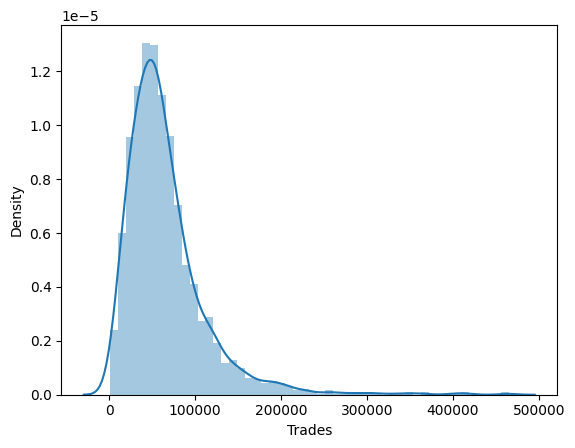

In [12]:
sns.distplot(df.Trades)

In [13]:
df[df.Trades.isna()].head(25)

Date   Symbol Series  Prev Close     Open     High      Low  \
0   2000-01-11  HCLTECH     EQ      580.00  1550.00  1725.00  1492.00   
1   2000-01-12  HCLTECH     EQ     1554.45  1560.00  1678.85  1560.00   
2   2000-01-13  HCLTECH     EQ     1678.85  1790.00  1813.20  1781.00   
3   2000-01-14  HCLTECH     EQ     1813.20  1958.30  1958.30  1835.00   
4   2000-01-17  HCLTECH     EQ     1958.30  2115.00  2115.00  1801.65   
5   2000-01-18  HCLTECH     EQ     1801.65  1730.55  1815.00  1657.55   
6   2000-01-19  HCLTECH     EQ     1774.50  1815.00  1889.00  1760.00   
7   2000-01-20  HCLTECH     EQ     1851.15  1865.00  1865.00  1750.00   
8   2000-01-21  HCLTECH     EQ     1757.85  1761.00  1815.00  1705.00   
9   2000-01-24  HCLTECH     EQ     1781.35  1834.90  1923.90  1795.00   
10  2000-01-25  HCLTECH     EQ     1923.90  1990.00  2077.85  1990.00   
11  2000-01-27  HCLTECH     EQ     2077.85  2239.90  2239.90  1965.00   
12  2000-01-28  HCLTECH     EQ     2080.60  2100.00  2245.00  2020.20   
13  2000-01-31  HCLTECH     EQ     2196.95  2111.00  2200.00  2021.20   
14  2000-02-01  HCLTECH     EQ     2030.40  1981.20  2180.00  1981.20   
15  2000-02-02  HCLTECH     EQ     2162.25  2260.00  2260.00  2010.00   
16  2000-02-03  HCLTECH     EQ     2024.25  2075.00  2075.00  1915.20   
17  2000-02-04  HCLTECH     EQ     1956.50  1993.00  2064.00  1965.00   
18  2000-02-07  HCLTECH     EQ     1986.60  1985.00  2119.95  1960.05   
19  2000-02-08  HCLTECH     EQ     2062.95  2049.40  2060.00  1970.00   
20  2000-02-09  HCLTECH     EQ     1999.20  2100.00  2100.00  1975.00   
21  2000-02-10  HCLTECH     EQ     1999.00  1976.65  2014.80  1965.00   
22  2000-02-11  HCLTECH     EQ     1996.75  1998.00  2156.50  1992.00   
23  2000-02-14  HCLTECH     EQ     2156.50  2199.00  2329.05  2199.00   
24  2000-02-15  HCLTECH     EQ     2324.70  2350.00  2510.70  2210.00   

       Last    Close     VWAP   Volume      Turnover  Trades  \
0   1560.00  1554.45  1582.72  1192200  1.886915e+14     NaN   
1   1678.85  1678.85  1657.05   344850  5.714349e+13     NaN   
2   1813.20  1813.20  1804.69    53000  9.564880e+12     NaN   
3   1958.30  1958.30  1939.90   270950  5.256169e+13     NaN   
4   1801.65  1801.65  1990.55   428800  8.535473e+13     NaN   
5   1775.00  1774.50  1716.39   359900  6.177280e+13     NaN   
6   1842.80  1851.15  1842.81   316050  5.824204e+13     NaN   
7   1753.50  1757.85  1801.37   204700  3.687409e+13     NaN   
8   1786.00  1781.35  1774.01   282150  5.005360e+13     NaN   
9   1923.90  1923.90  1875.34   328650  6.163317e+13     NaN   
10  2077.85  2077.85  2065.71   313500  6.476010e+13     NaN   
11  2078.00  2080.60  2101.92   352400  7.407150e+13     NaN   
12  2190.00  2196.95  2173.00   360800  7.840197e+13     NaN   
13  2021.20  2030.40  2083.45   217650  4.534620e+13     NaN   
14  2160.00  2162.25  2110.66   261000  5.508834e+13     NaN   
15  2035.00  2024.25  2085.91   326550  6.811542e+13     NaN   
16  1965.00  1956.50  1989.66   175800  3.497821e+13     NaN   
17  1977.00  1986.60  2008.25   176500  3.544560e+13     NaN   
18  2036.00  2062.95  2048.51   277850  5.691791e+13     NaN   
19  2014.00  1999.20  2017.09   199100  4.016027e+13     NaN   
20  1991.00  1999.00  2011.50   180500  3.630763e+13     NaN   
21  1990.00  1996.75  1992.36    76850  1.531132e+13     NaN   
22  2156.50  2156.50  2110.61   166150  3.506781e+13     NaN   
23  2329.05  2324.70  2293.27   265150  6.080618e+13     NaN   
24  2500.00  2508.40  2425.21   224500  5.444586e+13     NaN   

    Deliverable Volume  %Deliverble  
0                  NaN          NaN  
1                  NaN          NaN  
2                  NaN          NaN  
3                  NaN          NaN  
4                  NaN          NaN  
5                  NaN          NaN  
6                  NaN          NaN  
7                  NaN          NaN  
8                  NaN          NaN  
9                  NaN          NaN  
10                 NaN      

In [14]:
df[df.Trades.isna()].tail(25)

Date   Symbol Series  Prev Close    Open    High     Low    Last  \
2819  2011-04-27  HCLTECH     EQ      516.50  519.95  519.95  513.85  517.00   
2820  2011-04-28  HCLTECH     EQ      516.05  517.00  523.90  510.05  512.90   
2821  2011-04-29  HCLTECH     EQ      512.30  512.50  524.40  512.00  523.00   
2822  2011-05-02  HCLTECH     EQ      521.20  523.00  526.90  519.35  519.60   
2823  2011-05-03  HCLTECH     EQ      520.50  516.50  519.95  509.90  514.00   
2824  2011-05-04  HCLTECH     EQ      515.00  510.10  512.75  495.40  500.00   
2825  2011-05-05  HCLTECH     EQ      498.65  491.00  499.75  490.10  494.25   
2826  2011-05-06  HCLTECH     EQ      496.45  496.70  502.50  496.00  500.50   
2827  2011-05-09  HCLTECH     EQ      500.35  497.50  508.90  497.00  499.80   
2828  2011-05-10  HCLTECH     EQ      499.40  502.45  508.70  496.80  504.00   
2829  2011-05-11  HCLTECH     EQ      503.10  501.60  507.80  501.60  503.75   
2830  2011-05-12  HCLTECH     EQ      505.35  493.00  508.20  493.00  505.45   
2831  2011-05-13  HCLTECH     EQ      504.90  501.15  512.00  499.90  505.00   
2832  2011-05-16  HCLTECH     EQ      504.75  504.00  505.30  497.60  500.30   
2833  2011-05-17  HCLTECH     EQ      499.60  502.00  507.65  498.10  503.95   
2834  2011-05-18  HCLTECH     EQ      503.10  506.00  506.00  501.50  504.25   
2835  2011-05-19  HCLTECH     EQ      504.10  505.00  509.40  503.70  505.50   
2836  2011-05-20  HCLTECH     EQ      506.85  507.50  507.50  500.70  505.00   
2837  2011-05-23  HCLTECH     EQ      505.95  502.00  503.95  491.10  494.10   
2838  2011-05-24  HCLTECH     EQ      493.65  490.05  494.40  482.20  489.70   
2839  2011-05-25  HCLTECH     EQ      490.85  490.00  493.75  481.50  493.00   
2840  2011-05-26  HCLTECH     EQ      491.35  490.05  501.65  488.60  500.00   
2841  2011-05-27  HCLTECH     EQ      499.25  500.20  517.50  500.20  508.60   
2842  2011-05-30  HCLTECH     EQ      508.75  508.90  515.00  504.35  507.95   
2843  2011-05-31  HCLTECH     EQ      508.85  508.90  517.00  508.90  515.00   

       Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
2819  516.05  516.78   390559  2.018320e+13     NaN            185416.0   
2820  512.30  516.25   941168  4.858780e+13     NaN            455616.0   
2821  521.20  519.56   790862  4.109008e+13     NaN            471932.0   
2822  520.50  522.54   919050  4.802370e+13     NaN            419155.0   
2823  515.00  515.40   776426  4.001689e+13     NaN            461641.0   
2824  498.65  500.54   887636  4.442959e+13     NaN            429367.0   
2825  496.45  495.77  1058330  5.246878e+13     NaN            667600.0   
2826  500.35  499.80   595009  2.973880e+13     NaN            329615.0   
2827  499.40  501.44   585746  2.937180e+13     NaN            358375.0   
2828  503.10  503.65   463430  2.334047e+13     NaN            205474.0   
2829  505.35  505.11   214098  1.081429e+13     NaN             98699.0   
2830  504.90  504.71  1407142  7.101935e+13     NaN           1229967.0   
2831  504.75  505.44   710753  3.592418e+13     NaN            399376.0   
2832  499.60  500.92   305143  1.528510e+13     NaN            162159.0   
2833  503.10  502.91   454485  2.285654e+13     NaN            285455.0   
2834  504.10  503.63   797332  4.015628e+13     NaN            631101.0   
2835  506.85  506.92   860993  4.364506e+13     NaN            703841.0   
2836  505.95  505.75   225267  1.139299e+13     NaN            113992.0   
2837  493.65  496.59   218687  1.085967e+13     NaN            121384.0   
2838  490.85  486.72   592137  2.882043e+13     NaN            306265.0   
2839  491.35  486.55   454978  2.213711e+13     NaN            231390.0   
2840  499.25  498.86   947308  4.725720e+13     NaN            573695.0   
2841  508.75  510.16   807745  4.120796e+13     NaN            494084.0   
2842  508.85  509.19   380385  1.936866e+13     NaN            219296.0   
2843  514.80  513.42   991721  5.091718e+13     NaN     

- From above we can clearly see that the Trades data is missing from 2000-01-11 to 2011-04-27
- skewness of Trades is 2.6763404148371417
- Replacing Null Values in Trades with median 

In [15]:
df.Trades.median()

55244.5

In [16]:
df['Trades'] = df['Trades'].fillna(df.Trades.median(), axis=0)

In [17]:
# df['Deliverable Volume'].skew() = 4.664329638707167  ## Replacing Null Values with median
# df['%Deliverble'].skew() = -0.3485910825073967 ## Replacing Null values with Mean

In [18]:
df['Deliverable Volume'].fillna(df['Deliverable Volume'].median(), axis=0, inplace=True)
df['%Deliverble'].fillna(df['%Deliverble'].mean(), axis=0, inplace=True)

In [19]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [20]:
df.Date= pd.to_datetime(df.Date)

In [21]:
hcl=df.copy()

In [22]:
hcl.index = pd.to_datetime(hcl.Date)

In [23]:
hcl.shape

(5300, 15)

In [24]:
hcl.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [25]:
hcl=hcl['Prev Close']['2013-01-01':'2013-12-02']
hcl

Date
2013-01-01     618.70
2013-01-02     622.15
2013-01-03     625.25
2013-01-04     625.95
2013-01-07     634.05
               ...   
2013-11-26    1053.00
2013-11-27    1059.75
2013-11-28    1058.55
2013-11-29    1062.15
2013-12-02    1086.00
Name: Prev Close, Length: 230, dtype: float64

In [26]:
df['year'] = df.Date.dt.year

In [27]:
import plotly.express as px

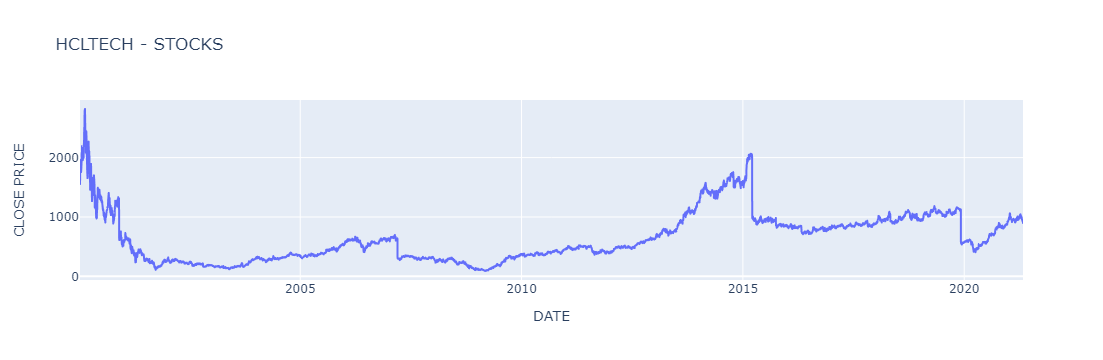

In [28]:
px.line(df, x='Date', y='Close', labels = {'Date': 'DATE', 'Close': 'CLOSE PRICE'}, title='HCLTECH - STOCKS')

In [29]:
minimum = df.groupby(by='year').agg({'Close':'min'}).reset_index()
maximum = df.groupby(by='year').agg({'Close':'max'}).reset_index()
average = df.groupby(by='year').agg({'Close':'mean'}).reset_index()

<Axes: title={'center': 'Minimum of close in a year'}, xlabel='year', ylabel='Close'>

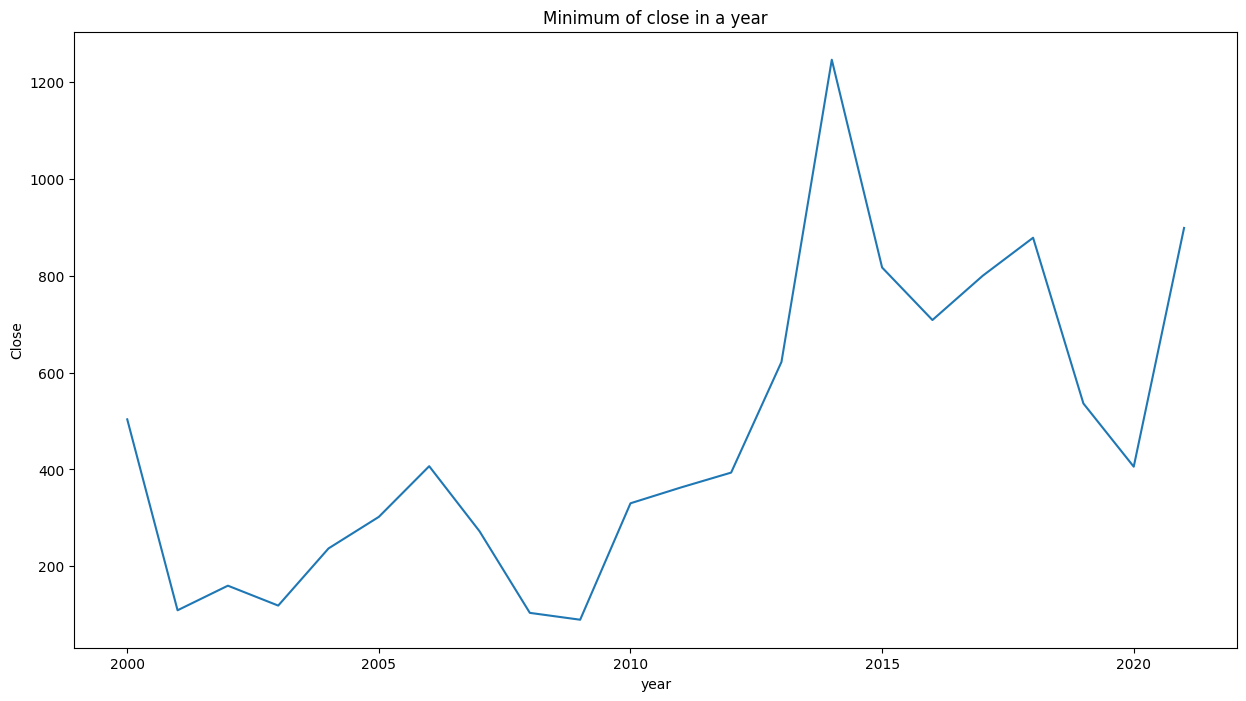

In [30]:
plt.figure(figsize=(15,8))
plt.title('Minimum of close in a year')
sns.lineplot(minimum, x='year', y='Close')

<Axes: title={'center': 'Maximum of close in a year'}, xlabel='year', ylabel='Close'>

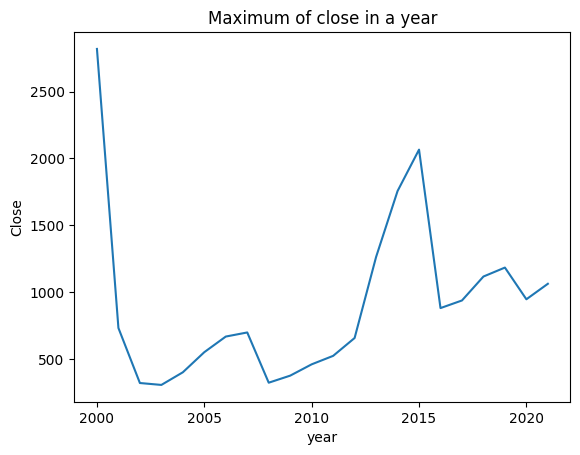

In [31]:

plt.title('Maximum of close in a year')
sns.lineplot(maximum, x='year', y='Close')

<Axes: title={'center': 'Average of close in a year'}, xlabel='year', ylabel='Close'>

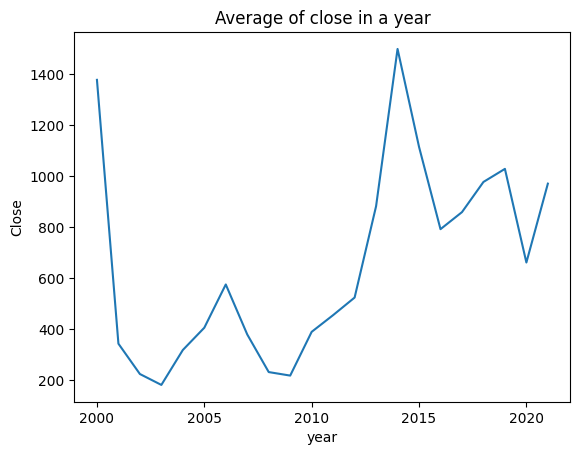

In [32]:
plt.title('Average of close in a year')
sns.lineplot(average, x='year', y='Close')

<Axes: xlabel='Symbol', ylabel='count'>

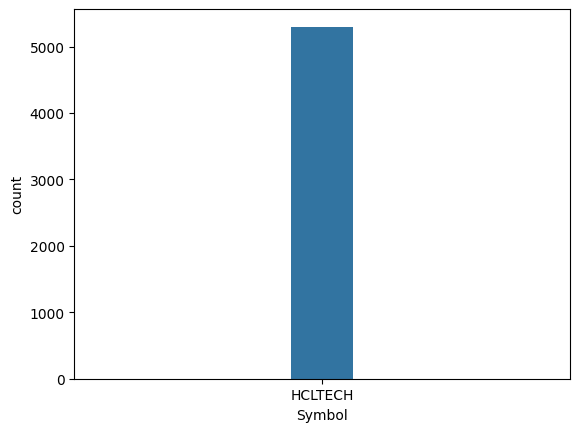

In [33]:
sns.countplot(data=df,x="Symbol", width=0.125)

<Axes: xlabel='Prev Close', ylabel='Density'>

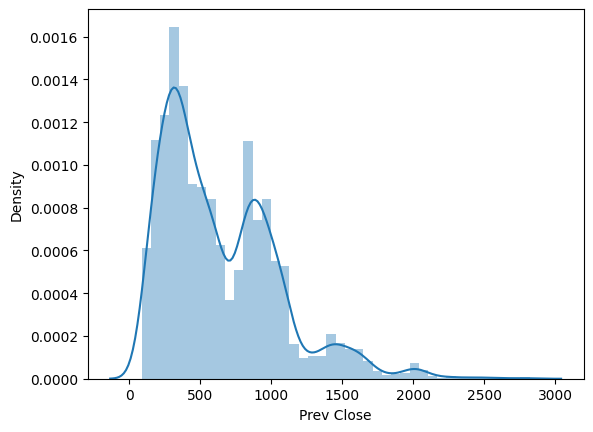

In [34]:
sns.distplot(a=df["Prev Close"])

<Axes: xlabel='Open', ylabel='Density'>

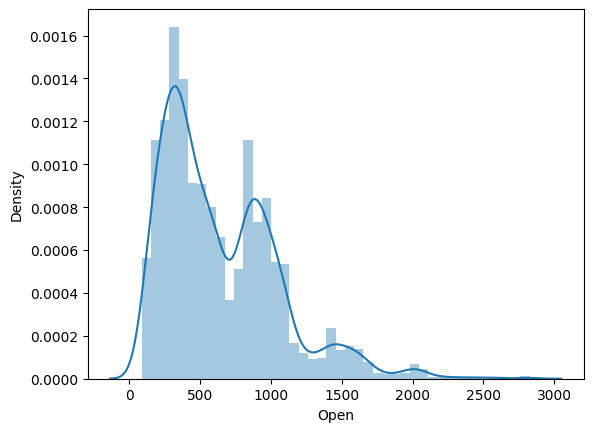

In [35]:
sns.distplot(a=df["Open"])

<Axes: xlabel='Volume', ylabel='Density'>

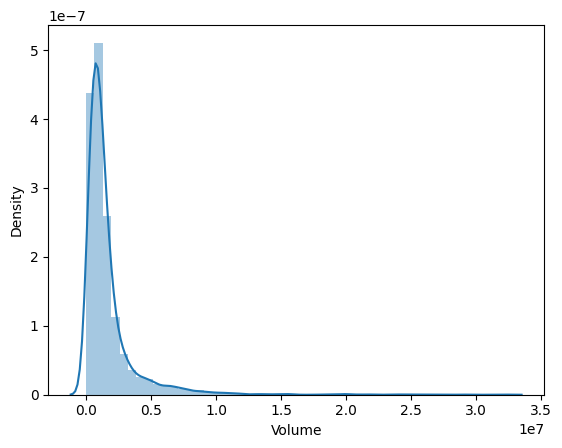

In [36]:
sns.distplot(a=df["Volume"])

<Axes: xlabel='Turnover', ylabel='Density'>

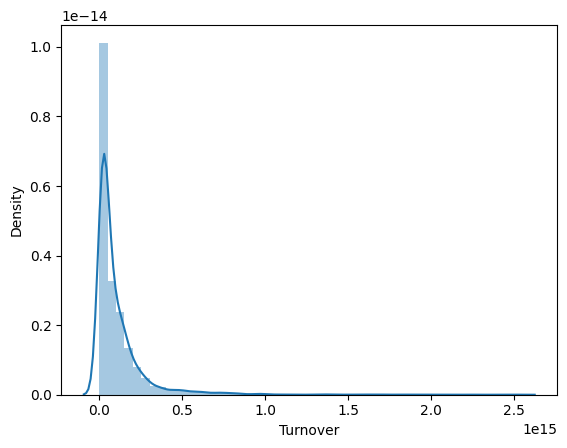

In [37]:
sns.distplot(a=df["Turnover"])

<Axes: >

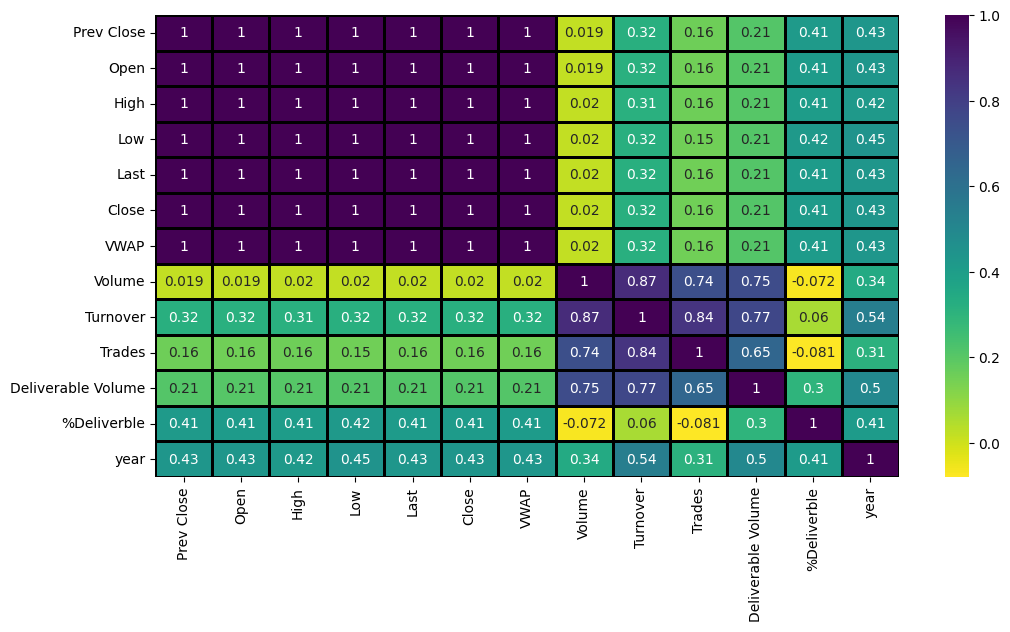

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis_r",linewidth=2,linecolor="k")

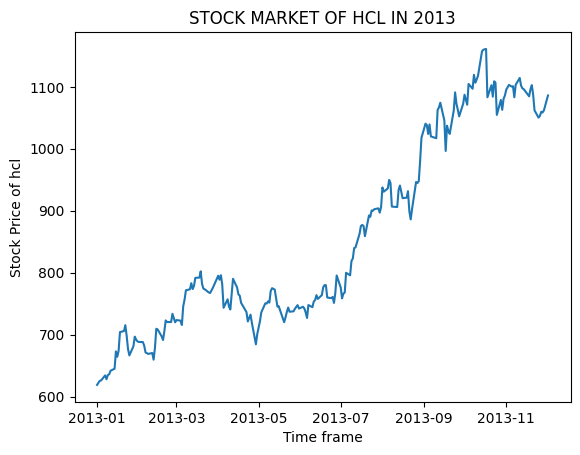

In [39]:
plt.plot(hcl)
plt.title("STOCK MARKET OF HCL IN 2013")
plt.xlabel("Time frame")
plt.ylabel("Stock Price of hcl")
plt.show()

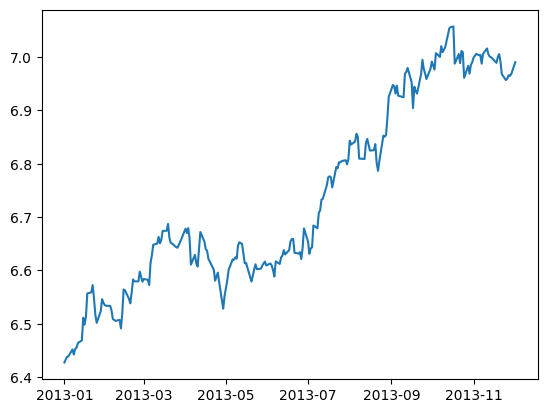

In [40]:
#here we are applying log function
st_log=np.log(hcl)
#it cal the log of an array hcl
plt.plot(st_log)

In [41]:
# plt.plot(hcl-hcl.shift())

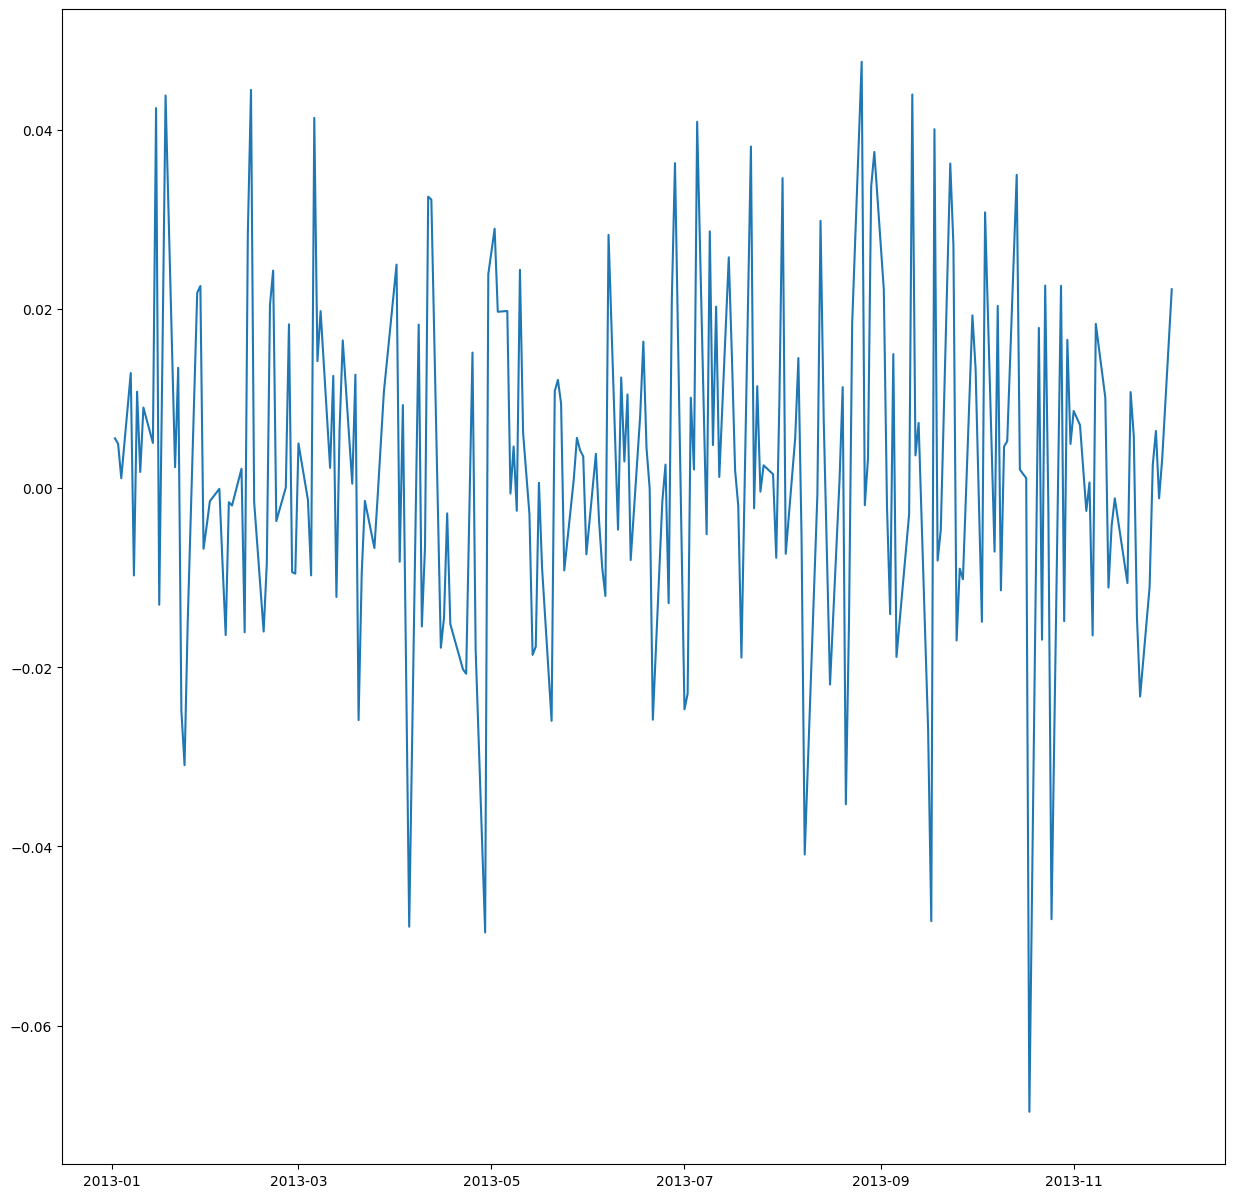

In [42]:
#differnating the log function
plt.figure(figsize=(15,15))
st_log_diff=st_log-st_log.shift()
#the logarithm of the stock and the logarithm of the previous day’s stock 
plt.plot(st_log_diff)

In [43]:
st_log_diff.dropna()

Date
2013-01-02    0.005561
2013-01-03    0.004970
2013-01-04    0.001119
2013-01-07    0.012857
2013-01-08   -0.009747
                ...   
2013-11-26    0.002615
2013-11-27    0.006390
2013-11-28   -0.001133
2013-11-29    0.003395
2013-12-02    0.022206
Name: Prev Close, Length: 229, dtype: float64

In [44]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



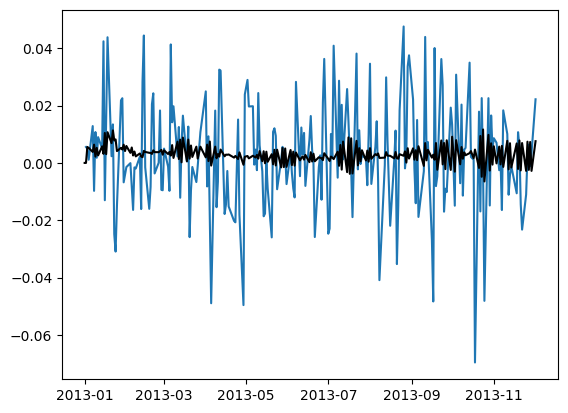

In [45]:
model=ARIMA(st_log_diff,order=(2,1,2))
results_arima=model.fit()
plt.plot(st_log_diff)
plt.plot(results_arima.fittedvalues,color='black')

In [46]:
import pmdarima as pm

In [47]:
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,
                             start_p=2,
                             start_q=2,
                              max_p=10,
                              max_q=10,
                              test='adf',
                              seasonal=True,
                              trace=True)
    return automodel

In [48]:
arimamodel(st_log)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1163.846, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.760 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



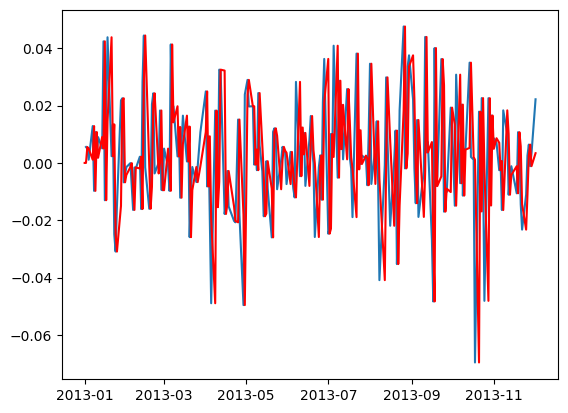

In [49]:
model=ARIMA(st_log_diff,order=(0,1,0))
results_arima=model.fit()
plt.plot(st_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

(p,d,f)=(0,1,0)
i applied those values to my model again and plotted the fitted model
original model(blue)nd predicted(black)

In [50]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Prev Close   No. Observations:                  230
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 497.439
Date:                Mon, 24 Jun 2024   AIC                           -992.878
Time:                        14:03:34   BIC                           -989.444
Sample:                             0   HQIC                          -991.492
                                - 230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0007   5.71e-05     12.181      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  43.62   Jarque-Bera (JB):                 7.45
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.75   Skew:                             0.32
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- overall data -->2000 to 2021

### Overrall dataset and prediction

In [51]:
df1=df[['Date','Prev Close']]

In [52]:
df1.index = pd.to_datetime(df1.Date)

In [53]:
df1.set_index('Date', inplace=True)

In [54]:
df = df.asfreq('D')

In [55]:
df1

Prev Close
Date                  
2000-01-11      580.00
2000-01-12     1554.45
2000-01-13     1678.85
2000-01-14     1813.20
2000-01-17     1958.30
...                ...
2021-04-26      955.65
2021-04-27      928.80
2021-04-28      928.85
2021-04-29      923.80
2021-04-30      909.55

[5300 rows x 1 columns]

In [56]:
# data=df1['Prev Close']['2000-01-11':'2021-04-30']
# data

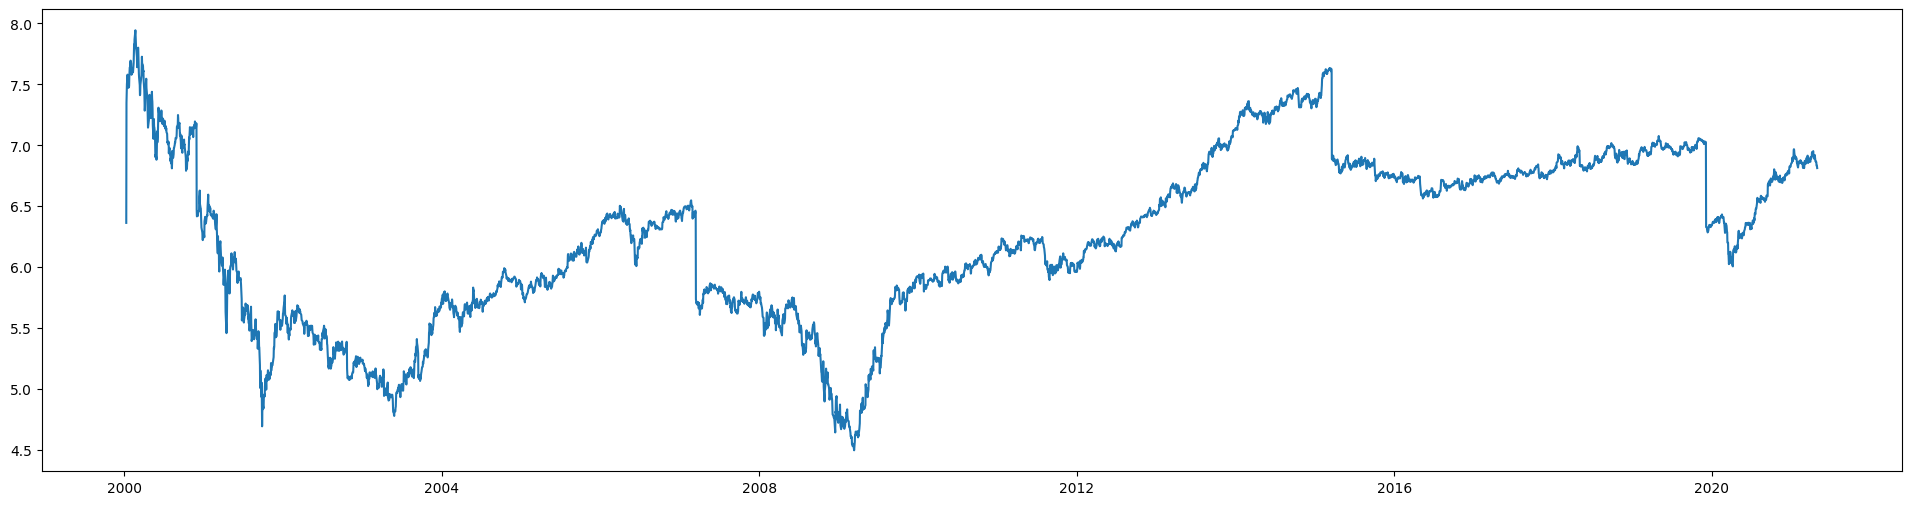

In [57]:
data_log = np.log(df1)
plt.figure(figsize=(24,6))
plt.plot(data_log)

In [58]:
data_log

Prev Close
Date                  
2000-01-11    6.363028
2000-01-12    7.348877
2000-01-13    7.425864
2000-01-14    7.502849
2000-01-17    7.579832
...                ...
2021-04-26    6.862392
2021-04-27    6.833893
2021-04-28    6.833947
2021-04-29    6.828496
2021-04-30    6.812950

[5300 rows x 1 columns]

In [58]:
# data_log_diff = data_log - data_log.shift()

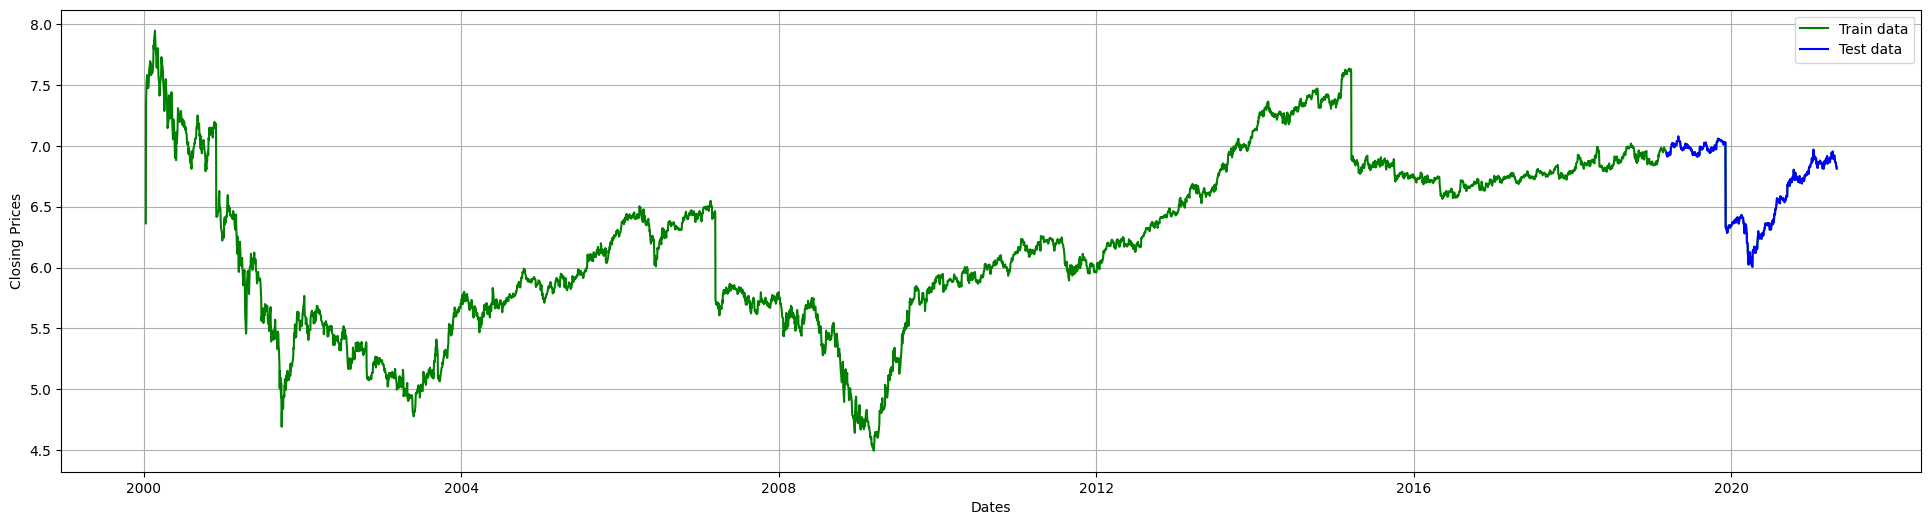

In [60]:
train_data, test_data = data_log[3:int(len(data_log)*0.9)], data_log[int(len(data_log)*0.9):]
plt.figure(figsize=(24,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [61]:
arimamodel(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-18404.977, Time=7.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9875.514, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3587.863, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30990.263, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-18401.632, Time=1.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-18399.798, Time=3.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-18335.422, Time=8.88 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-18406.349, Time=8.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-18408.468, Time=2.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-5228.855, Time=2.62 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-18407.671, Time=2.79 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1461.865, Time=3.33 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-7746.555, Time=4.61 sec
 ARIMA(2,0,4)(0,0,0)

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True)

In [62]:
model1=ARIMA(train_data,order=(1,0,3))
results_arima1=model1.fit()
print(results_arima1.summary())

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:             Prev Close   No. Observations:                 4767
Model:                 ARIMA(1, 0, 3)   Log Likelihood                9210.264
Date:                Mon, 24 Jun 2024   AIC                         -18408.529
Time:                        14:05:49   BIC                         -18369.712
Sample:                             0   HQIC                        -18394.891
                               - 4767                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4144      0.247     26.008      0.000       5.931       6.898
ar.L1          0.9984      0.001   1802.048      0.000       0.997       0.999
ma.L1          0.0561      0.010      5.561      0.0

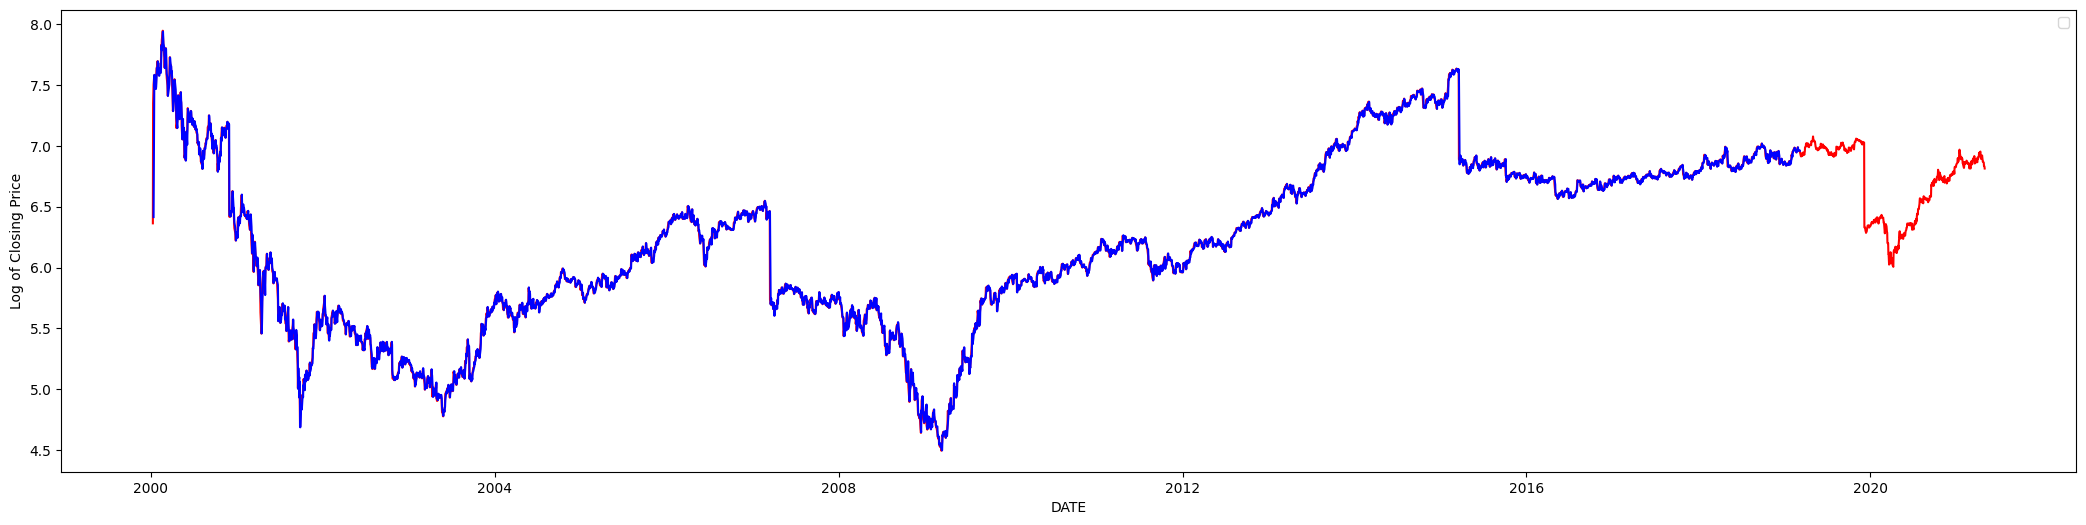

In [66]:
plt.figure(figsize=(26,6))
plt.xlabel("DATE")
plt.ylabel("Log of Closing Price")
plt.plot(data_log, color='red')
plt.plot(results_arima1.fittedvalues,color='blue')

In [67]:
# Forecast
res = results_arima1.get_forecast(steps=len(test_data),alpha=0.05)  # 95% conf
fc = res.predicted_mean
se = res.se_mean
conf = res.conf_int()

C:\Users\dhana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [68]:
# Make forecast results into pandas Series
fc_series = pd.Series(fc)
lower_series = pd.Series(conf.iloc[:, 0])
upper_series = pd.Series(conf.iloc[:, 1])

In [69]:
fc_series.index = test_data.index
lower_series.index= test_data.index
upper_series.index= test_data.index

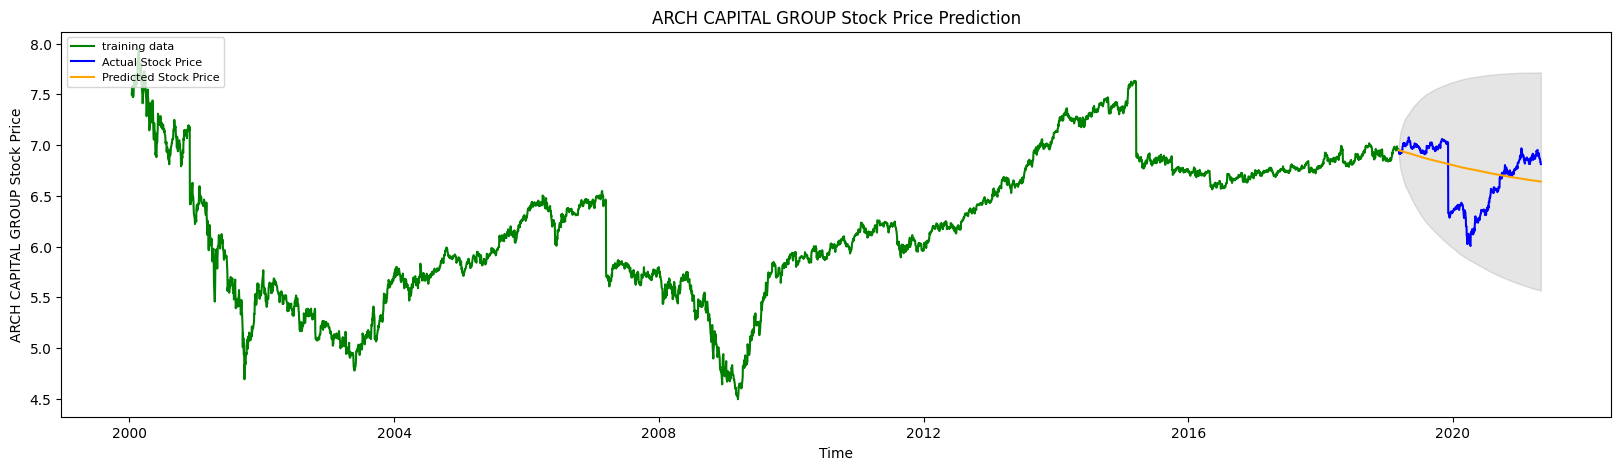

In [71]:

plt.figure(figsize=(20,5), dpi=100)
plt.plot(train_data, label='training data', color='green')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()